## **Battle of Neigborhoods: Comparing neignobroods between two cities - "Large to Small"**

### **1. Introduction**
In United States it is common to switch jobs and relocated from city to city, however relocation often poses a significant discomfort as new place might be quite different from the place person **XYZ** currently likes and enjoys a lot.  One of the drastic changes could be if **XYZ** considers moving from a large to a small city or vice versa, in this project we will explore the problem of moving from large to small city. The main question is if there are neighboroods with similar venues? 


### **Large To Small**
As an axample of a large city we will choose **Alexandria, VA** which is part of Washintgon, DC Metro area and for small city we will use **Kalamazoo, MI**

### **2. Data Overview**
We will need the following data to solve the problem

* List of neighborhoods and corresponding zipcodes for both cities 
* Longitude and Latitude coordinates for each neighborhood
* List of venues their data for each neighborhood.

### **3. Method**
1. We are going to use Foursquare data to locate venues in neighborhoods.
2. Cluster neigborhoods using K-means method for each city.
3. Map clusters using Foliuum 
4. Explore Clusters
5. Compare Clustered Neighborhoods between two cities

### **4. Start Processing Data**

#### **Import Libriaries**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
# uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#print('Libraries imported.')

#### **Load Neighobrhoods for chosen cities**

In [2]:
#Alexandria zip codes and coordinates
df_alex = pd.read_csv('Alexandria0.csv',sep=';')
df_alex.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,22320,Alexandria,VA,38.804413,-77.046699,-5,1,"38.804413,-77.046699"
1,22314,Alexandria,VA,38.806163,-77.051390,-5,1,"38.806163,-77.05139"
2,22334,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005"
3,22309,Alexandria,VA,38.725214,-77.107340,-5,1,"38.725214,-77.10734"
4,22333,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005"


In [3]:
df_alex.shape

(22, 8)

In [119]:
#Kalamazoo zip codes and coordinates
df_kz = pd.read_csv('kz.csv',sep=';')
df_kz.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,49005,Kalamazoo,MI,42.323045,-85.493232,-5,1,"42.323045,-85.493232"
1,49001,Kalamazoo,MI,42.278891,-85.551070,-5,1,"42.278891,-85.55107"
2,49009,Kalamazoo,MI,42.272538,-85.692550,-5,1,"42.272538,-85.69255"
3,49007,Kalamazoo,MI,42.297140,-85.585730,-5,1,"42.29714,-85.58573"
4,49008,Kalamazoo,MI,42.265490,-85.610980,-5,1,"42.26549,-85.61098"


In [120]:
df_kz.shape

(10, 8)

#### **Combine data frames**

In [5]:
#Combine data frames
df=pd.concat([df_alex,df_kz]).reset_index()
df.head()

,index,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,0,22320,Alexandria,VA,38.804413,-77.046699,-5,1,"38.804413,-77.046699"
1,1,22314,Alexandria,VA,38.806163,-77.051390,-5,1,"38.806163,-77.05139"
2,2,22334,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005"
3,3,22309,Alexandria,VA,38.725214,-77.107340,-5,1,"38.725214,-77.10734"
4,4,22333,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005"


#### **Import Foursqaure API**

In [6]:
CLIENT_ID = 'TSHBCNYI4F44V2AS0Q4J4L30UHDRZMVAH35YVFQSDO0QN0ET' # your Foursquare ID
CLIENT_SECRET = 'H4MDHCAGDRZJTYAL3J3Y123ETEUHWKQ3W2J2VPUSACUQMHUT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TSHBCNYI4F44V2AS0Q4J4L30UHDRZMVAH35YVFQSDO0QN0ET
CLIENT_SECRET:H4MDHCAGDRZJTYAL3J3Y123ETEUHWKQ3W2J2VPUSACUQMHUT


#### **Use geopy library to get the latitude and longitude values of Alexandria and Kalamazoo.**

In [7]:
address = 'Washington, DC'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Alexandria are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Alexandria are 38.8949855, -77.0365708.


In [8]:
address = 'Kalamazoo, MI'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kalamazoo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Kalamazoo are 42.291707, -85.5872286.


In [11]:
# create map of Alexandria and Kalamazoo using latitude and longitude values of zip codes
map_df = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, zipcode, city, in zip(df['Latitude'], df['Longitude'], df['Zip'], df['City']):
    label = '{}, {}'.format(city, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_df)  
    
map_df

#### **Get nearby venues using Foursquare API**

In [83]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [84]:
radius = 2000
LIMIT = 100

In [85]:
alex_venues = getNearbyVenues(names=df_alex['Zip'],
                                   latitudes=df_alex['Latitude'],
                                   longitudes=df_alex['Longitude']
                                  )


22320
22314
22334
22309
22333
22307
22302
22332
22308
22331
22313
22312
22301
22304
22315
22310
22311
22306
22336
22305
22303
22321


In [86]:
kz_venues = getNearbyVenues(names=df_kz['Zip'],
                                   latitudes=df_kz['Latitude'],
                                   longitudes=df_kz['Longitude']
                                  )


49005
49001
49009
49007
49008
49003
49019
49006
49048
49004


In [89]:
#Alexandria Venues
print(alex_venues.shape)
alex_venues.head()


(1919, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,22320,38.804413,-77.046699,Old Town Alexandria,38.805065,-77.047792,Neighborhood
1,22320,38.804413,-77.046699,Nando's Peri-Peri,38.805002,-77.047422,Portuguese Restaurant
2,22320,38.804413,-77.046699,Sugarhouse Day Spa & Salon,38.805927,-77.048893,Spa
3,22320,38.804413,-77.046699,The Spice & Tea Exchange of Alexandria,38.804555,-77.043206,Herbs & Spices Store
4,22320,38.804413,-77.046699,"The Alexandrian, Autograph Collection",38.804445,-77.044550,Hotel


In [88]:
#Kalamazoo Venues
print(kz_venues.shape)
kz_venues.head()

(381, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,49005,42.323045,-85.493232,BIGGBY COFFEE,42.328002,-85.513721,Coffee Shop
1,49005,42.323045,-85.493232,Qdoba Mexican Grill,42.327867,-85.514227,Mexican Restaurant
2,49005,42.323045,-85.493232,Culver's,42.329434,-85.510709,Fast Food Restaurant
3,49005,42.323045,-85.493232,Penn Station East Coast Subs,42.327758,-85.513881,Sandwich Place
4,49005,42.323045,-85.493232,SUBWAY,42.331761,-85.510393,Sandwich Place


In [96]:
#Combine venues dataframes
df_venues=pd.concat([alex_venues,kz_venues]).reset_index()
df_venues.head()
df_venues.shape

(2300, 8)

(48, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,49001,42.278891,-85.55107,C J's Pub,42.281062,-85.553305,Pub
1,49001,42.278891,-85.55107,Julianna's Restaurant,42.280606,-85.553364,American Restaurant
2,49001,42.278891,-85.55107,"Bennett Property Services, LLC",42.280285,-85.555713,Home Service
3,49001,42.278891,-85.55107,Masseys Lakewood Beverage,42.279563,-85.545485,Liquor Store
4,49001,42.278891,-85.55107,Michigan Rebels Girls Fastpitch & Boys Baseball,42.280161,-85.556685,Athletics & Sports


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
396,22303,38.792863,-77.079640,Euro Foods,38.789836,-77.077063,Eastern European Restaurant
397,22303,38.792863,-77.079640,Sunflower Florist,38.789851,-77.076967,Flower Shop
398,22303,38.792863,-77.079640,Huntington Metro Station,38.794976,-77.075089,Metro Station
399,22321,38.831813,-77.288755,Fairfax Memorial,38.831204,-77.285004,Park
400,22321,38.831813,-77.288755,Heimstatte Contractors,38.831835,-77.289054,Home Service


### **Comapre most popular venues categories for both cities**

#### from graphs below we can easily see that Alexandria is a bigger city with a significantly more venues that Kalamazoo. However, top venues in both cities are similar - Pizza and sandwich places, coffee shops, gocery stores and hotels (which is a bit surprising for Kalamazoo).


In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
fig_size = (20,12)
fig_fc = '#ffffff'


Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

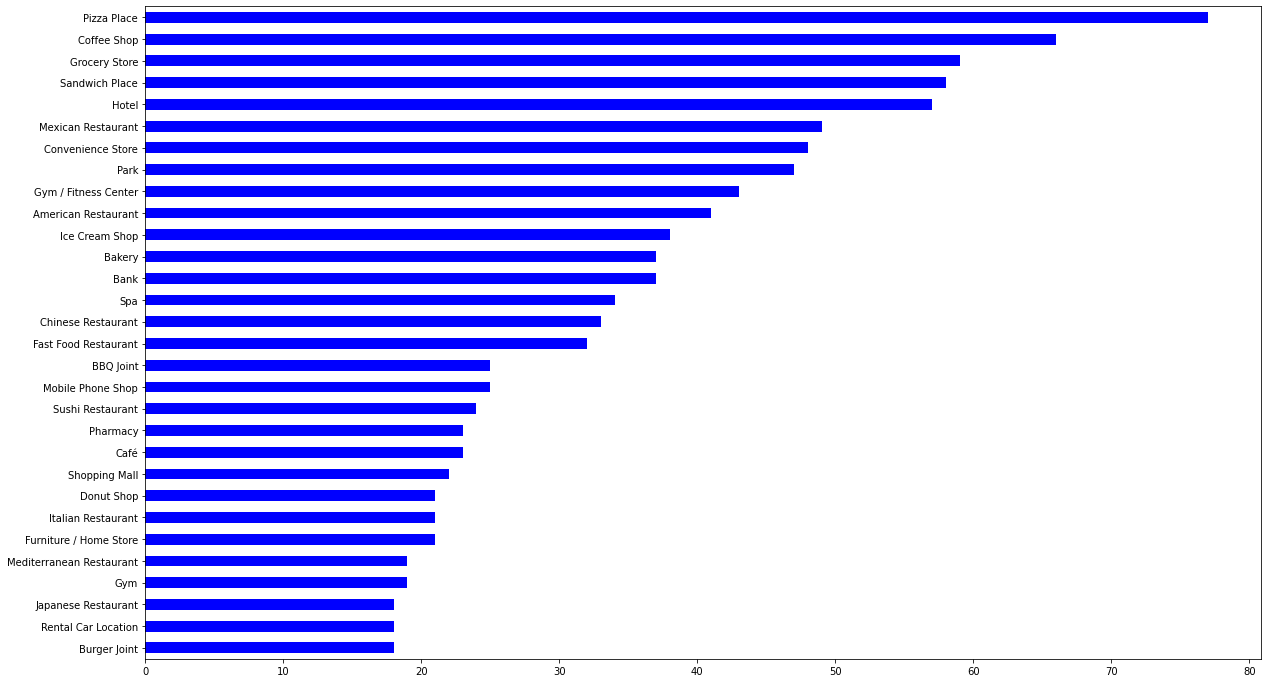

In [93]:
#Alexandria Venue Count
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
alex_top = alex_venues['Venue Category'].value_counts(normalize=False)
ax = alex_top.head(30).plot(kind='barh', color='b');
ax.invert_yaxis()


Text(0, 0.5, 'Venue Category')

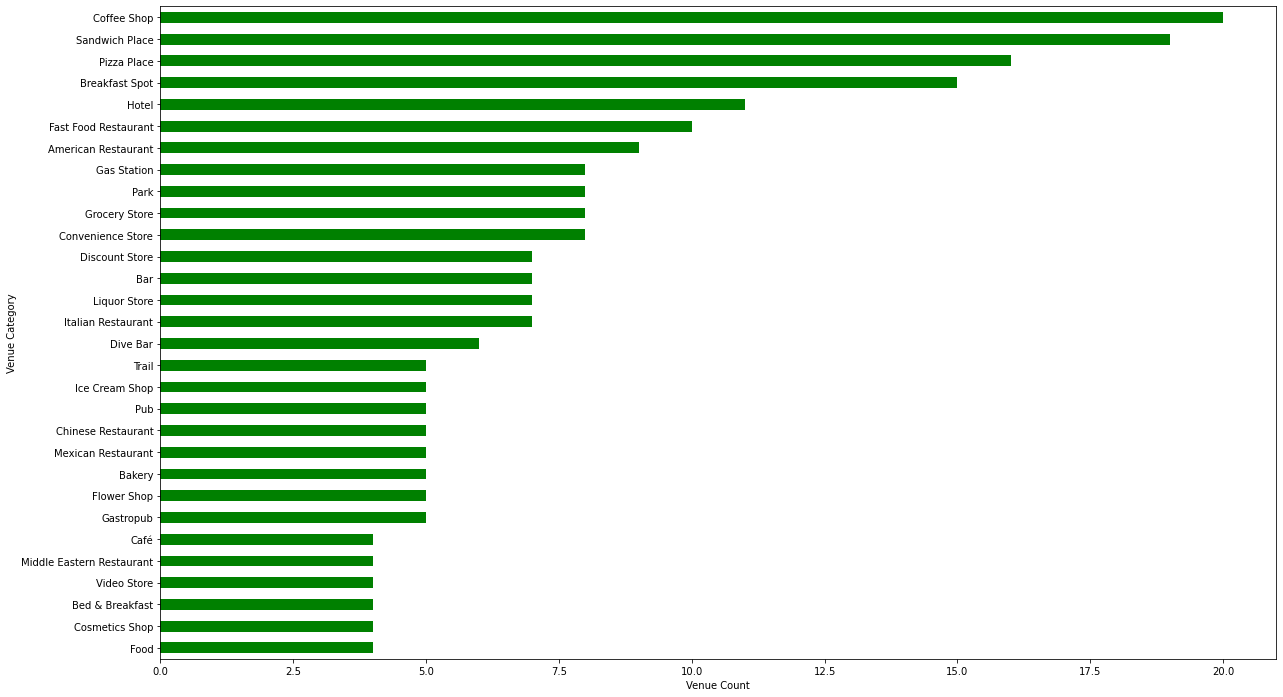

In [92]:
#Kalamazoo Venue Count
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
kz_top = kz_venues['Venue Category'].value_counts(normalize=False)
ax = kz_top.head(30).plot(kind='barh', color='g');
ax.invert_yaxis()
plt.xlabel('Venue Count')
plt.ylabel('Venue Category')


#### **Check how many venues were returned for each neighborhood**

In [97]:
df_venues.groupby('Neighborhood').count()


,index,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
22301,100,100,100,100,100,100,100
22302,40,40,40,40,40,40,40
22303,100,100,100,100,100,100,100
22304,100,100,100,100,100,100,100
22305,100,100,100,100,100,100,100
22306,83,83,83,83,83,83,83
22307,80,80,80,80,80,80,80
22308,24,24,24,24,24,24,24
22309,55,55,55,55,55,55,55


#### **Find out how many unique categories can be curated from all the returned venues**

In [98]:
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))

There are 238 uniques categories.


#### **Perform one hot encoding and Analyze Each Neighborhood**

In [99]:
# one hot encoding
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Yoga Studio,ATM,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Carpet Store,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Cafeteria,College Hockey Rink,College Rec Center,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Library,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Lab,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Trail,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,

In [100]:
df_onehot.shape

(2300, 238)

#### **Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [101]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reset_index()
df_grouped.head()

,Neighborhood,Yoga Studio,ATM,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Carpet Store,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Cafeteria,College Hockey Rink,College Rec Center,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Library,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Lab,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Trail,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,22301,0.01,0.0,0.0,0.00,0.02,0.00,0.0,0.010,0.00,0.0,0.0,0.00,0.02,0.0,0.02,0.00,0.00,0.0,0.0,0.0,0.0,0.01,0.00,0.000,0.0,0.01,0.01,0.0,0.01,0.000,0.0,0.0,0.010,0.000,0.0,0.00,0.03,0.00,0.0,0.0,0.010,0.00,0.01,0.01,0.00,0.01,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.0,0.00,0.00,0.0,0.01,0.0,0.00,0.0,0.01,0.00,0.0,0.0,0.000,0.0,0.01,0.00,0.000,0.01,0.00,0.00,0.01,0.0,0.00,0.01,0.01,0.0,0.000,0.00,0.0,0.0,0.0,0.02,0.050,0.010,0.01,0.

In [102]:
df_grouped.shape

(32, 238)

In [23]:
#num_top_venues = 5

#for hood in alex_grouped['Neighborhood']:
  #  print("----"+str(hood)+"----")
  #  temp = alex_grouped[alex_grouped['Neighborhood'] == hood].T.reset_index()
  #  temp.columns = ['venue','freq']
  #  temp = temp.iloc[1:]
  #  temp['freq'] = temp['freq'].astype(float)
  #  temp = temp.round({'freq': 2})
  #  print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
  #  print('\n')

#### **Display the top 10 venues for each neighborhood.**

In [103]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [104]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(alex_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22301,Grocery Store,Pizza Place,Coffee Shop,New American Restaurant,Hotel,Spa,Ice Cream Shop,Park,Mexican Restaurant,Café
1,22302,American Restaurant,Bakery,Mexican Restaurant,Pet Store,Cheese Shop,Soccer Field,Juice Bar,Smoothie Shop,Food Truck,Burger Joint
2,22303,Hotel,Sandwich Place,Gym / Fitness Center,Convenience Store,Pizza Place,Bakery,BBQ Joint,Mexican Restaurant,Coffee Shop,Chinese Restaurant
3,22304,Pizza Place,Gym / Fitness Center,Park,Sandwich Place,Chinese Restaurant,Rental Car Location,Convenience Store,Grocery Store,Mexican Restaurant,Middle Eastern Restaurant
4,22305,Grocery Store,Coffee Shop,Pizza Place,Spa,Ice Cream Shop,Convenience Store,Mexican Restaurant,Burger Joint,Shopping Mall,Furniture / Home Store


#### **Perform Elbow method to find optimal number of Clusters**

234567891011121314

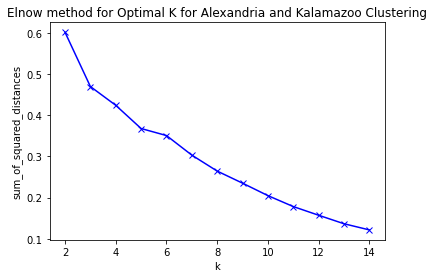

In [106]:
sum_of_squared_distances = []
K=range(2,15)
df_grouped_clustering = df_grouped.drop('Neighborhood', 1)
for k in K:
    print(k, end='')
    kmeans_df=KMeans(n_clusters= k).fit(df_grouped_clustering)
    sum_of_squared_distances.append(kmeans_df.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elnow method for Optimal K for Alexandria and Kalamazoo Clustering')
plt.show()



#### **Cluster Neighborhoods**

In [107]:
# set number of clusters
kclusters = 5

df_grouped_clustering = df_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:50] 

array([1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       4, 0, 4, 2, 2, 1, 2, 2, 0, 4], dtype=int32)

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,22320,Alexandria,VA,38.804413,-77.046699,-5,1,"38.804413,-77.046699"
1,22314,Alexandria,VA,38.806163,-77.051390,-5,1,"38.806163,-77.05139"
2,22334,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005"
3,22309,Alexandria,VA,38.725214,-77.107340,-5,1,"38.725214,-77.10734"
4,22333,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005"


In [108]:
df.rename(columns={'Zip':'Neighborhood'}, inplace=True)
df.head()

,index,Neighborhood,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,0,22320,Alexandria,VA,38.804413,-77.046699,-5,1,"38.804413,-77.046699"
1,1,22314,Alexandria,VA,38.806163,-77.051390,-5,1,"38.806163,-77.05139"
2,2,22334,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005"
3,3,22309,Alexandria,VA,38.725214,-77.107340,-5,1,"38.725214,-77.10734"
4,4,22333,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005"


In [109]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22301,Grocery Store,Pizza Place,Coffee Shop,New American Restaurant,Hotel,Spa,Ice Cream Shop,Park,Mexican Restaurant,Café
1,22302,American Restaurant,Bakery,Mexican Restaurant,Pet Store,Cheese Shop,Soccer Field,Juice Bar,Smoothie Shop,Food Truck,Burger Joint
2,22303,Hotel,Sandwich Place,Gym / Fitness Center,Convenience Store,Pizza Place,Bakery,BBQ Joint,Mexican Restaurant,Coffee Shop,Chinese Restaurant
3,22304,Pizza Place,Gym / Fitness Center,Park,Sandwich Place,Chinese Restaurant,Rental Car Location,Convenience Store,Grocery Store,Mexican Restaurant,Middle Eastern Restaurant
4,22305,Grocery Store,Coffee Shop,Pizza Place,Spa,Ice Cream Shop,Convenience Store,Mexican Restaurant,Burger Joint,Shopping Mall,Furniture / Home Store


In [110]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

df_merged.head() # check the last columns!

,index,Neighborhood,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,22320,Alexandria,VA,38.804413,-77.046699,-5,1,"38.804413,-77.046699",1,Ice Cream Shop,Park,Coffee Shop,American Restaurant,Italian Restaurant,Seafood Restaurant,Hotel,Mexican Restaurant,Grocery Store,French Restaurant
1,1,22314,Alexandria,VA,38.806163,-77.051390,-5,1,"38.806163,-77.05139",1,American Restaurant,Ice Cream Shop,Hotel,Coffee Shop,Italian Restaurant,Pizza Place,Park,Seafood Restaurant,Southern / Soul Food Restaurant,Spa
2,2,22334,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005",2,Sandwich Place,Bank,Grocery Store,Chinese Restaurant,Rental Car Location,Pizza Place,Coffee Shop,Bakery,Mobile Phone Shop,Donut Shop
3,3,22309,Alexandria,VA,38.725214,-77.107340,-5,1,"38.725214,-77.10734",2,Pizza Place,Convenience Store,Mexican Restaurant,Thrift / Vintage Store,Fast Food Restaurant,Sandwich Place,Thai Restaurant,Hotel,Grocery Store,Gas Station
4,4,22333,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005",2,Sandwich Place,Bank,Grocery Store,Chinese Restaurant,Rental Car Location,Pizza Place,Coffee Shop,Bakery,Mobile Phone Shop,Donut Shop


In [111]:
df_merged.dropna(inplace=True)
df_merged['Cluster Labels'] =df_merged['Cluster Labels'].astype(int)
df_merged.head()

,index,Neighborhood,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,22320,Alexandria,VA,38.804413,-77.046699,-5,1,"38.804413,-77.046699",1,Ice Cream Shop,Park,Coffee Shop,American Restaurant,Italian Restaurant,Seafood Restaurant,Hotel,Mexican Restaurant,Grocery Store,French Restaurant
1,1,22314,Alexandria,VA,38.806163,-77.051390,-5,1,"38.806163,-77.05139",1,American Restaurant,Ice Cream Shop,Hotel,Coffee Shop,Italian Restaurant,Pizza Place,Park,Seafood Restaurant,Southern / Soul Food Restaurant,Spa
2,2,22334,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005",2,Sandwich Place,Bank,Grocery Store,Chinese Restaurant,Rental Car Location,Pizza Place,Coffee Shop,Bakery,Mobile Phone Shop,Donut Shop
3,3,22309,Alexandria,VA,38.725214,-77.107340,-5,1,"38.725214,-77.10734",2,Pizza Place,Convenience Store,Mexican Restaurant,Thrift / Vintage Store,Fast Food Restaurant,Sandwich Place,Thai Restaurant,Hotel,Grocery Store,Gas Station
4,4,22333,Alexandria,VA,38.815762,-77.090050,-5,1,"38.815762,-77.09005",2,Sandwich Place,Bank,Grocery Store,Chinese Restaurant,Rental Car Location,Pizza Place,Coffee Shop,Bakery,Mobile Phone Shop,Donut Shop


#### **Visualize the resulting clusters**

In [112]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighborhood'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### **Examine Clusters**

In [113]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Neighborhood,Longitude,Timezone,Daylight savings time flag,geopoint,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,49003,-85.529858,-5,1,"42.245412,-85.529858",0,Hotel,Fast Food Restaurant,Breakfast Spot,Sandwich Place,Pizza Place,Shipping Store,Hockey Arena,Gastropub,Bowling Alley,Gas Station


In [114]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Neighborhood,Longitude,Timezone,Daylight savings time flag,geopoint,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22320,-77.046699,-5,1,"38.804413,-77.046699",1,Ice Cream Shop,Park,Coffee Shop,American Restaurant,Italian Restaurant,Seafood Restaurant,Hotel,Mexican Restaurant,Grocery Store,French Restaurant
1,22314,-77.051390,-5,1,"38.806163,-77.05139",1,American Restaurant,Ice Cream Shop,Hotel,Coffee Shop,Italian Restaurant,Pizza Place,Park,Seafood Restaurant,Southern / Soul Food Restaurant,Spa
6,22302,-77.082040,-5,1,"38.829512,-77.08204",1,American Restaurant,Bakery,Mexican Restaurant,Pet Store,Cheese Shop,Soccer Field,Juice Bar,Smoothie Shop,Food Truck,Burger Joint
7,22332,-77.072679,-5,1,"38.803142,-77.072679",1,Hotel,Coffee Shop,Gym / Fitness Center,Café,Sandwich Place,New American Restaurant,Mexican Restaurant,Ice Cream Shop,Grocery Store,BBQ Joint
9,22331,-77.070733,-5,1,"38.801342,-77.070733",1,Hotel,Coffee Shop,Gym / Fitness Center,American Restaurant,BBQ Joint,Pizza Place,New American Restaurant,Mexican Restaurant,Café,Ice Cream Shop
12,22301,-77.058540,-5,1,"38.819863,-77.05854",1,Grocery Store,Pizza Place,Coffee Shop,New American Restaurant,Hotel,Spa,Ice Cream Shop,Park,Mexican Restaurant,Café
25,49007,-85.585730,-5,1,"42.29714,-85.58573",1,Coffee Shop,Bar,American Restaurant,Brewery,Breakfast Spot,Italian Restaurant,Pub,Gastropub,Pizza Place,Bed & Breakfast


In [115]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Neighborhood,Longitude,Timezone,Daylight savings time flag,geopoint,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,22334,-77.090050,-5,1,"38.815762,-77.09005",2,Sandwich Place,Bank,Grocery Store,Chinese Restaurant,Rental Car Location,Pizza Place,Coffee Shop,Bakery,Mobile Phone Shop,Donut Shop
3,22309,-77.107340,-5,1,"38.725214,-77.10734",2,Pizza Place,Convenience Store,Mexican Restaurant,Thrift / Vintage Store,Fast Food Restaurant,Sandwich Place,Thai Restaurant,Hotel,Grocery Store,Gas Station
4,22333,-77.090050,-5,1,"38.815762,-77.09005",2,Sandwich Place,Bank,Grocery Store,Chinese Restaurant,Rental Car Location,Pizza Place,Coffee Shop,Bakery,Mobile Phone Shop,Donut Shop
5,22307,-77.059300,-5,1,"38.774863,-77.0593",2,Hotel,Pizza Place,Convenience Store,Sandwich Place,Gym / Fitness Center,Pool,American Restaurant,Park,Bank,Donut Shop
10,22313,-77.090050,-5,1,"38.815762,-77.09005",2,Sandwich Place,Bank,Grocery Store,Chinese Restaurant,Rental Car Location,Pizza Place,Coffee Shop,Bakery,Mobile Phone Shop,Donut Shop
11,22312,-77.153700,-5,1,"38.817362,-77.1537",2,Pizza Place,Convenience Store,Fast Food Restaurant,Sandwich Place,Mobile Phone Shop,Gas Station,Korean Restaurant,Asian Restaurant,Café,Cosmetics Shop
13,22304,-77.116670,-5,1,"38.813013,-77.11667",2,Pizza Place,Gym / Fitness Center,Park,Sandwich Place,Chinese Restaurant,Rental Car Location,Convenience Store,Grocery Store,Mexican Restaurant,Middle Eastern Restaurant
14,22315,-77.152840,-5,1,"38.757924,-77.15284",2,Pizza Place,Sandwich Place,Gym / Fitness Center,Furniture / Home Store,Fast Food Restaurant,Mediterranean Restaurant,Bakery,Sports Bar,Spa,Donut Shop
15,22310,-77.121250,-5,1,"38.782013,-77.12125",2,Pizza Place,Fast Food Restaurant,Coffee Shop,Sandwich Place,Gym / Fitness Center,Cosmetics Shop,Clothing Store,Gas Station,Indian Restaurant,Discount Store
16,22311,-77.120640,-5,1,"38.837312,-77.12064",2,Convenience Store,Sandwich Place,Park,Hotel,Ice Cream Shop,Ethiopian Restaurant,Market,Mexican Restaurant,Pizza Place,Coffee Shop


In [116]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Neighborhood,Longitude,Timezone,Daylight savings time flag,geopoint,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,22308,-77.05701,-5,1,"38.728464,-77.05701",3,Park,Convenience Store,Scenic Lookout,American Restaurant,Playground,Grocery Store,Chinese Restaurant,Garden,Museum,Jewelry Store


In [117]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Neighborhood,Longitude,Timezone,Daylight savings time flag,geopoint,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,49001,-85.55107,-5,1,"42.278891,-85.55107",4,Park,Convenience Store,American Restaurant,Liquor Store,Coffee Shop,Baseball Field,Farmers Market,Storage Facility,Italian Restaurant,Donut Shop
31,49004,-85.56635,-5,1,"42.330089,-85.56635",4,Park,Discount Store,Grocery Store,Pizza Place,Marijuana Dispensary,Sandwich Place,Liquor Store,Gas Station,Baseball Field,Bakery


In [118]:
df_merged.loc[df_merged['Cluster Labels'] == 5, df_merged.columns[[1] + list(range(5, df_merged.shape[1]))]]

,Neighborhood,Longitude,Timezone,Daylight savings time flag,geopoint,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


#### **Observations**

#### Only clusters 1 and 2 are common between two cities
#### 1) Purple Cluster - is downtown area densly populated with cafes, restaraounts and hotels.
#### 2) Ligh Blue Cluster - Residential Area populated with cacual eateries such as sandwitch shops, pizzas and groceries stores.
